### Line Plot of Preliminary Data, trying to express the (1) reason deficiency (2) generality (3) locality problem all in one

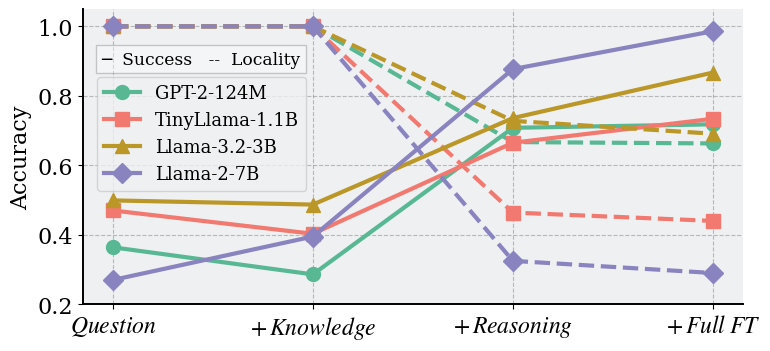

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

# ---- Styling ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16


# ---- Data (first four = success, last four = locality) ------------------
raw = [
    [0.364, 0.286, 0.708, 0.718],   # success  GPT-2-125M
    [0.470, 0.403, 0.665, 0.734],
    [0.499, 0.487, 0.736, 0.867],
    [0.270, 0.395, 0.877, 0.986],
    [1.000, 1.000, 0.667, 0.663],   # locality GPT-2-125M
    [1.000, 1.000, 0.464, 0.440],
    [1.000, 1.000, 0.728, 0.691],
    [1.000, 1.000, 0.325, 0.290],
]
succ, loc = raw[:4], raw[4:]

model_names = ['GPT-2-124M', 'TinyLlama-1.1B',
               'Llama-3.2-3B', 'Llama-2-7B']
cot_ids  = ['Question', '+ Knowledge', '+ Reasoning', '+ Full FT']
cot_ids = [
    r'$\mathit{Question}$',           # italic
    r'$\mathit{+\,Knowledge}$',       # italic
    r'$\mathit{+\,Reasoning}$',       # italic
    r'$\mathit{+\,Full\;FT}$'         # bold
]
x        = np.arange(len(cot_ids))

# ---- Plotting -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 4))


colors = [(87/255.0, 184/255.0, 147/255.0), '#F27970', '#BB9727', '#8983BF']  # blue, orange, green, red
markers = ['o', 's', '^', 'D']  # different dot shapes for models

for m, model in enumerate(model_names):
    # Success (solid)
    ax.plot(x, succ[m], label=model,
            color=colors[m], marker=markers[m], linestyle='-',
            linewidth=3, markersize=10)
    
    # Locality (dashed) -- no extra legend entry
    ax.plot(x, loc[m], color=colors[m], marker=markers[m],
            linestyle='--', linewidth=3, markersize=10, label="_nolegend_")

# axes settings
ax.set_ylim(0.2, 1.05)
ax.set_xticks(x)
ax.set_xticklabels(cot_ids, rotation=0, fontsize=17)
ax.set_ylabel('Accuracy', fontsize=16)
# ax.set_title('Success vs. Locality across Editing Settings')

# Main legend (models only)
ax.legend(loc='upper center', bbox_to_anchor=(0.18, 0.8),
          ncol=1, frameon=True, fontsize=13)

# Inline annotation for metric line styles
ax.text(0.028, 0.83, '─  Success   --  Locality',
        transform=ax.transAxes, fontsize=12.3,
        verticalalignment='center', bbox=dict(facecolor='white', alpha=0.4, edgecolor='gray'))

# border line removal (up)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# left and bottom lines
ax.spines['left'].set_linewidth(1.4)
ax.spines['bottom'].set_linewidth(1.4)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('figures/line_preliminary.pdf',
            dpi=600, bbox_inches='tight')

### Bar plot comparing the fact-checking performance and reasoning performance

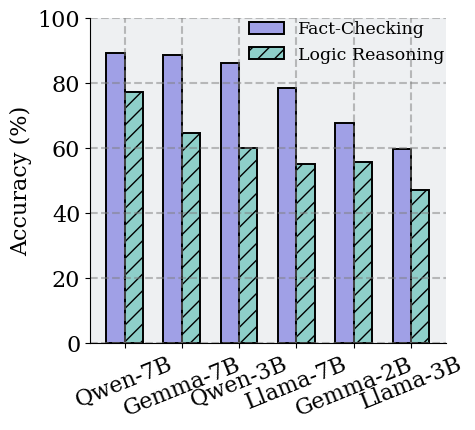

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm, rcParams

# ---- Styling ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ----------------------- pseudo numbers for 6 LLMs -----------------------
data = {
    "Model": ["Llama-7B", "Llama-3B", "Gemma-7B", "Gemma-2B", "Qwen-7B", "Qwen-3B"],
    "Fact-checking (%)": [78.4, 59.8, 88.8, 67.9, 89.2, 86.2],
    "Reasoning (%)":     [55.0, 47.2, 64.8, 55.8, 77.3, 60.2],
}
df = pd.DataFrame(data)

# -------- sort left→right by fact-checking performance (high → low) ------
df = df.sort_values("Fact-checking (%)", ascending=False).reset_index(drop=True)

# ----------------------- grouped bar plot --------------------------------
x = np.arange(len(df))
bar_w = 0.32

fig, ax = plt.subplots(figsize=(6/1.2, 5.5/1.2))

ax.bar(x - bar_w/2, df["Fact-checking (%)"], bar_w,
       color=(160/255, 160/255, 230/255), edgecolor='black', linewidth=1.4,
       label="Fact-Checking")

ax.bar(x + bar_w/2, df["Reasoning (%)"], bar_w,
       color=(142/255, 207/255, 201/255), edgecolor='black', linewidth=1.4,
       hatch='//', label="Logic Reasoning")

# —— cosmetics ——
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(df["Model"], rotation=22, ha="center", fontsize=16)
ax.set_facecolor("#EEF0F2")
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.04, 1.04), fontsize=12.5)

plt.tight_layout()
plt.savefig('/scratch/vjd5zr/project/ReasonEdit/results/figures/fact_reason.pdf', dpi=600, bbox_inches='tight')

### scatter plot of generality v.s. locality

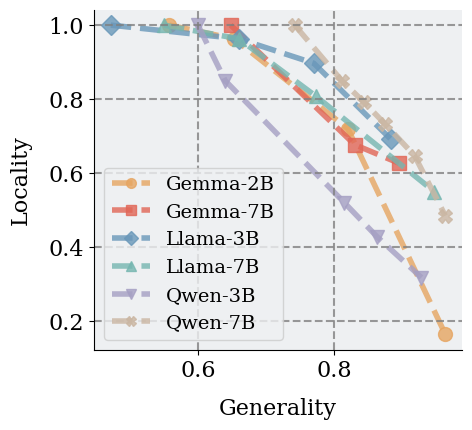

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# --------------- results -----------------------------------------------
runs = {
    # "Gemma-2B": [(0.530, 1), (0.628, 0.838),
    #              (0.838, 0.456), (0.973, 0.112), (0.998, 0.004),,  (0.995, 0.023)],
    "Gemma-2B": [ (0.653, 0.963), (0.558, 1), (0.963, 0.165), (0.820, 0.720),],
    # "Gemma-7B": [(0.603, 1), (0.879, 0.708), (0.967, 0.407),
    #              (0.996, 0.090), (0.953, 0.495)],(1.000, 0.03)
    "Gemma-7B": [ (0.895, 0.627), (0.648, 1), (0.830, 0.677)],
    # "Llama-3B": [(0.231, 1), (0.325, 0.947), (0.554, 0.808),
    #              (0.855, 0.436), (0.996, 0.008), (0.993, 0.078)],
    "Llama-3B": [ (0.472,1), (0.770, 0.897), (0.883, 0.692), (0.660, 0.963)],
    # "Llama-7B": [(0.483, 1), (0.734, 0.902),
    #              (0.883, 0.456), (1.000, 0.010), (0.993, 0.078)],
    "Llama-7B": [(0.947, 0.550), (0.660, 0.963), (0.773, 0.808), (0.550, 1)],
    # "Qwen-3B": [(0.548, 1), (0.661, 0.935), (0.718, 0.843), (0.930, 0.219), (0.830, 0.509)],
    "Qwen-3B": [(0.928, 0.318), (0.60, 1), (0.815, 0.520), (0.863, 0.428), (0.64, 0.85)],
    # "Qwen-7B": [(0.583, 1), (0.867, 0.493), (0.644, 0.973), (0.957, 0.002)]
    "Qwen-7B": [(0.812, 0.848), (0.963, 0.485), (0.742, 1), (0.843, 0.793), (0.875, 0.732), (0.918, 0.647)],
}

# ---------- bar-chart palette reused here -------------------------------
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255)   # beige
]

offset = (-0.1, -0.1, -0.1)

markers = ["o", "s", "D", "^", "v", "X"]

fig, ax = plt.subplots(figsize=(6/1.2, 5.5/1.2))

for (model, points), color, marker in zip(runs.items(), palette, markers):
    # --- optionally impose an ordering (here: ascending x) -------------
    xs, ys = zip(*sorted(points, key=lambda p: p[0]))  # drop “sorted” if not desired
    # line (drawn first so markers sit on top)
    color_offset = [c + off for c, off in zip(color, offset)]
    ax.plot(xs, ys,
            linewidth=4,           # slightly thicker than default
            color=color_offset,
            linestyle='--',  # solid line
            marker=marker, markersize=10,
            label=model, alpha=0.8,
            zorder=1)                # keeps it behind the scatter dots

    # scatter markers
    # ax.scatter(xs, ys,
    #            s=100, marker=marker,
    #            facecolor=color, edgecolor="black", linewidth=1.8,
    #            label=model, alpha=0.5,
            #    zorder=2)

# ---------- cosmetics ----------------------------------------------------
ax.set_xlabel("Generality", labelpad=12)
ax.set_ylabel("Locality", labelpad=12)
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.8)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(frameon=True, markerscale=0.7, fontsize=14)
plt.tight_layout()
plt.savefig("/scratch/vjd5zr/project/ReasonEdit/results/figures/trade_off.pdf", dpi=600, bbox_inches="tight")

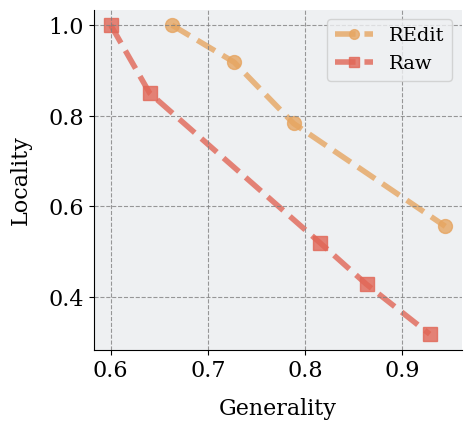

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# --------------- results -----------------------------------------------
runs = {
    # "Gemma-2B": [(0.530, 1), (0.628, 0.838),
    #              (0.838, 0.456), (0.973, 0.112), (0.998, 0.004),,  (0.995, 0.023)],
    "REdit": [(0.788, 0.783), (0.727, 0.918), (0.663, 1), (0.944, 0.556)],
    # "Gemma-7B": [(0.603, 1), (0.879, 0.708), (0.967, 0.407),
    #              (0.996, 0.090), (0.953, 0.495)],(1.000, 0.03)
    # "Gemma-7B": [ (0.895, 0.627), (0.648, 1), (0.830, 0.677)],
    # "Llama-3B": [(0.231, 1), (0.325, 0.947), (0.554, 0.808),
    # #              (0.855, 0.436), (0.996, 0.008), (0.993, 0.078)],
    # "Llama-3B": [ (0.472,1), (0.770, 0.897), (0.883, 0.692), (0.660, 0.963)],
    # # "Llama-7B": [(0.483, 1), (0.734, 0.902),
    # #              (0.883, 0.456), (1.000, 0.010), (0.993, 0.078)],
    # "Llama-7B": [(0.947, 0.550), (0.660, 0.963), (0.773, 0.808), (0.550, 1)],
    # # "Qwen-3B": [(0.548, 1), (0.661, 0.935), (0.718, 0.843), (0.930, 0.219), (0.830, 0.509)],
    "Raw": [(0.928, 0.318), (0.60, 1), (0.815, 0.520), (0.863, 0.428), (0.64, 0.85)],
    # # "Qwen-7B": [(0.583, 1), (0.867, 0.493), (0.644, 0.973), (0.957, 0.002)]
    # "Qwen-7B": [(0.812, 0.848), (0.963, 0.485), (0.742, 1), (0.843, 0.793), (0.875, 0.732), (0.918, 0.647)],
}

# ---------- bar-chart palette reused here -------------------------------
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255)   # beige
]

offset = (-0.1, -0.1, -0.1)

markers = ["o", "s", "D", "^", "v", "X"]

fig, ax = plt.subplots(figsize=(6/1.2, 5.5/1.2))

for (model, points), color, marker in zip(runs.items(), palette, markers):
    # --- optionally impose an ordering (here: ascending x) -------------
    xs, ys = zip(*sorted(points, key=lambda p: p[0]))  # drop “sorted” if not desired
    # line (drawn first so markers sit on top)
    color_offset = [c + off for c, off in zip(color, offset)]
    ax.plot(xs, ys,
            linewidth=4,           # slightly thicker than default
            color=color_offset,
            linestyle='--',  # solid line
            marker=marker, markersize=10,
            label=model, alpha=0.8,
            zorder=1)                # keeps it behind the scatter dots

    # scatter markers
    # ax.scatter(xs, ys,
    #            s=100, marker=marker,
    #            facecolor=color, edgecolor="black", linewidth=1.8,
    #            label=model, alpha=0.5,
            #    zorder=2)

# ---------- cosmetics ----------------------------------------------------
ax.set_xlabel("Generality", labelpad=12)
ax.set_ylabel("Locality", labelpad=12)
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.8)
ax.spines[['top', 'right']].set_visible(False)
ax.legend(frameon=True, markerscale=0.7, fontsize=14)
plt.tight_layout()
plt.savefig("/scratch/vjd5zr/project/ReasonEdit/results/figures/trade_off_redit.pdf", dpi=600, bbox_inches="tight")

### Preliminary Motivation

#### All x-y

✓ Saved scatter → ../../../results/output/attr_scores/qwen2_5_3b_instruct/10/scatter.png


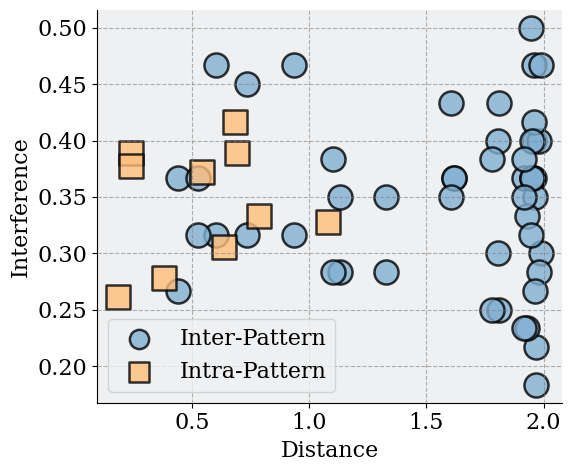

In [2]:
# scatter_plot_styled.py  ────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1. 读取两份矩阵 CSV (行列索引必须一致) ────────────────────────────
path_y = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta.csv")                   # X 轴
path_x = Path("../../../results/output/attr_scores/qwen2_5_3b_instruct/10/weighted_edit_distance_raw.csv") # Y 轴

mx = pd.read_csv(path_x, index_col=0)
my = pd.read_csv(path_y, index_col=0)
my = my.loc[mx.index, mx.columns]                               # 行列对齐

vals_x = mx.values.flatten()
vals_y = my.values.flatten()

# ── 2. 颜色、标记与样式（复用 bar-chart palette） ────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]
markers = ["o", "s"]            # off-diag → 圆点；diag → 方块

label0 = {0, 1, 3, 4, 8}                 # indices with label 0
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])

# ── 1.  Build boolean masks  ────────────────────────────────────────────
off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
# diff_label_mask = np.zeros_like(diff_label_mask, dtype=bool)
# diff_label_mask[1] = 2
nonzero_mask    = (vals_x != 0) & (vals_y != 0)        # <── new line
plot_mask = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
diag_mask  = (~off_diag_mask).flatten()          # unchanged

# ── 2.  Scatter plot  ───────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))

# off-diagonal *and* different-label pairs
ax.scatter(vals_x[plot_mask], vals_y[plot_mask],
           s=300, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Inter-Pattern")

ax.scatter(vals_x[diag_mask], vals_y[diag_mask],
           s=300, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Pattern")

# ── 4. 统一风格（与柱状图相同） ──────────────────────────────────────
ax.set_xlabel("Distance")
ax.set_ylabel("Interference")
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_x.parent / "scatter.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved scatter →", out)

#### average by row

✓ Saved scatter → /scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/scatter.png


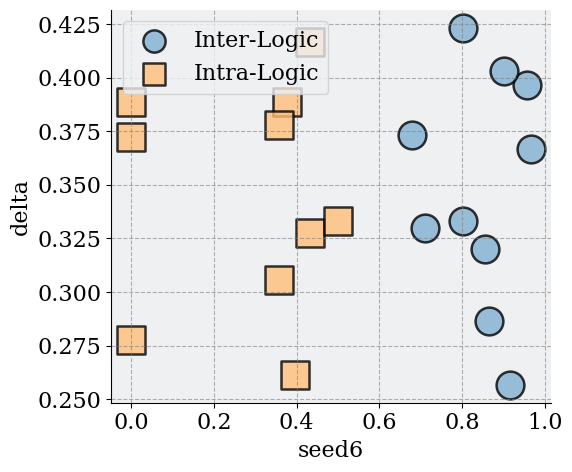

In [1]:
# scatter_plot_styled.py  ────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1. 读取两份矩阵 CSV (行列索引必须一致) ────────────────────────────
path_y = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta.csv")                   # X 轴
path_x = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/seed6.csv") # Y 轴

mx = pd.read_csv(path_x, index_col=0)
my = pd.read_csv(path_y, index_col=0)
my = my.loc[mx.index, mx.columns]                               # 行列对齐

vals_x = mx.values.flatten()
vals_y = my.values.flatten()

# ── 2. 颜色、标记与样式（复用 bar-chart palette） ────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]
markers = ["o", "s"]            # off-diag → 圆点；diag → 方块

label0 = {0, 1, 3, 4, 8}                 # indices with label 0
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])

# ── 1.  Build boolean masks  ────────────────────────────────────────────
off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
# diff_label_mask = np.zeros_like(diff_label_mask, dtype=bool)
# diff_label_mask[1] = 2
nonzero_mask    = (vals_x != 0) & (vals_y != 0)        # <── new line
plot_mask = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
diag_mask  = (~off_diag_mask).flatten()          # unchanged

plot_mask_sq = (off_diag_mask & diff_label_mask) & ((mx.values != 0) & (my.values != 0))
mean_x, mean_y = [], []
for i in range(mx.shape[0]):
    # pick columns j where the (i,j) entry is an Inter-Logic point
    js = np.where(plot_mask_sq[i])[0]
    if len(js) == 0:
        continue                    # skip rows with no blue points
    mean_x.append(mx.iloc[i, js].mean())
    mean_y.append(my.iloc[i, js].mean())

# ── 2.  Scatter plot  ───────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))

# off-diagonal *and* different-label pairs
ax.scatter(mean_x, mean_y,
           s=400, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Inter-Logic")


ax.scatter(vals_x[diag_mask], vals_y[diag_mask],
           s=400, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Logic")

# ── 4. 统一风格（与柱状图相同） ──────────────────────────────────────
ax.set_xlabel(path_x.stem)
ax.set_ylabel(path_y.stem)
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_x.parent / "scatter.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved scatter →", out)

#### average by window - macro

✓ Saved sliding-window scatter → /scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/scatter_sliding.png


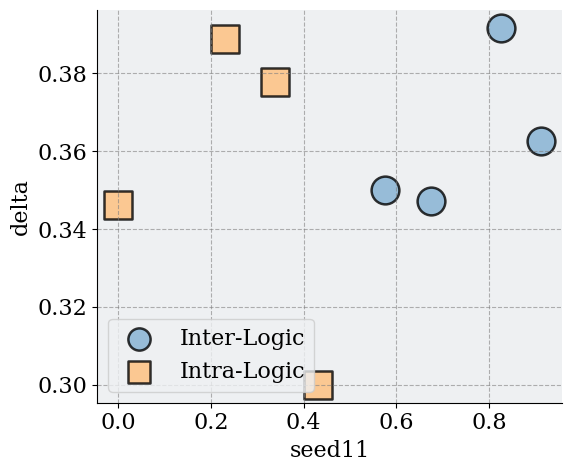

In [4]:
# scatter_plot_styled.py  ────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import cm, rcParams

plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1. 读取两份矩阵 CSV (行列索引必须一致) ────────────────────────────
path_y = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta.csv")                   # X 轴
path_x = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/seed11.csv") # Y 轴

mx = pd.read_csv(path_x, index_col=0)
my = pd.read_csv(path_y, index_col=0)
my = my.loc[mx.index, mx.columns]                               # 行列对齐

vals_x = mx.values.flatten()
vals_y = my.values.flatten()

# ── 2. 颜色、标记与样式（复用 bar-chart palette） ────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]
markers = ["o", "s"]            # off-diag → 圆点；diag → 方块

label0 = {0, 1, 3, 4, 8}                 # indices with label 0
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])


# ── 2.  Scatter plot  ───────────────────────────────────────────────────
# ── 0. params for sliding aggregation ───────────────────────────────────
win   = 0.1        # window width along the X axis  (edit-distance units)
step  = 0.1        # slide step                     (edit-distance units)

# helper: aggregate one mask -----------------------------------------------------
def aggregate_by_window(x, y, the_mask, win, step):
    xs, ys, sizes = [], [], []
    x_sel, y_sel  = x[the_mask], y[the_mask]
    lo, hi = x_sel.min(), x_sel.max()
    for left in np.arange(lo, hi - win + 1e-9, step):
        right = left + win
        in_win = (x_sel >= left) & (x_sel < right)
        if in_win.any():
            xs.append(x_sel[in_win].mean())           # window centre
            ys.append(y_sel[in_win].mean())           # avg  Δ-score
            sizes.append(in_win.sum())                # #points in window
    return np.array(xs), np.array(ys), np.array(sizes)

# ── 1. derive masks exactly as before ───────────────────────────────────
off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
nonzero_mask    = (vals_x != 0) & (vals_y != 0)
plot_mask = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
diag_mask = (~off_diag_mask).flatten()

# ── 2. aggregate ----------------------------------------------------------------
x_inter, y_inter, n_inter = aggregate_by_window(vals_x, vals_y, plot_mask, win, step)
x_intra, y_intra, n_intra = aggregate_by_window(vals_x, vals_y, diag_mask,  win, step)

# ── 3. scatter plot -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(x_inter, y_inter, s=400, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label=f"Inter-Logic")

ax.scatter(x_intra, y_intra, s=400, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Logic")

# ── 4. same styling as before ---------------------------------------------------
ax.set_xlabel(path_x.stem)
ax.set_ylabel(path_y.stem)
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_x.parent / "scatter_sliding.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved sliding-window scatter →", out)

#### average by window - micro

✓ Saved accuracy-by-distance scatter → /scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/scatter_acc.png


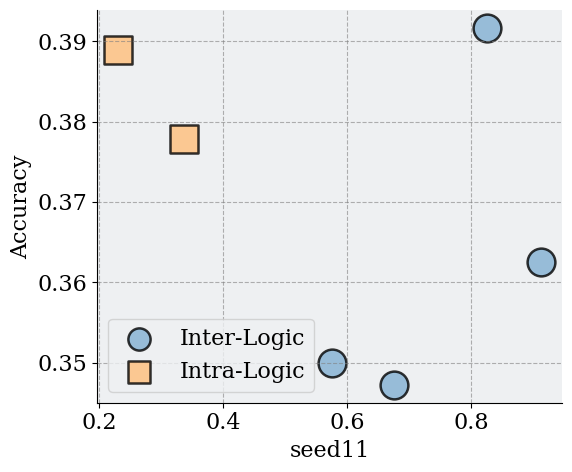

In [5]:
# scatter_plot_acc_by_distance.py  ────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

# ── 1.  CSV paths ───────────────────────────────────────────────────────
path_dist = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/distance/jaccard/seed11.csv")   # X axis
path_tot  = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/n_total.csv")          # totals
path_cor  = Path("/scratch/vjd5zr/project/ReasonEdit/results/output/perlogic/0p00015/delta_count.csv")          # correct

# ── 2.  Load & align matrices ───────────────────────────────────────────
mx     = pd.read_csv(path_dist, index_col=0)                      # distance
m_tot  = pd.read_csv(path_tot, index_col=0).loc[mx.index, mx.columns]
m_cor  = pd.read_csv(path_cor, index_col=0).loc[mx.index, mx.columns]
m_acc  = m_cor.where(m_tot != 0) / m_tot                          # accuracy

vals_x   = mx.values.flatten()          # distance for every pair
acc_vals = m_acc.values.flatten()       # accuracy  "
tot_vals = m_tot.values.flatten()       # sample count per pair

# ── 3.  Logic-group labels (same as before) ─────────────────────────────
label0 = {0, 1, 3, 4, 8}
labels = np.array([0 if i in label0 else 1 for i in range(len(mx))])

off_diag_mask   = ~np.eye(len(mx), dtype=bool)
diff_label_mask = labels[:, None] != labels[None, :]
nonzero_mask    = (vals_x != 0) & (~np.isnan(acc_vals))          # drop NaNs
mask_inter = (off_diag_mask & diff_label_mask).flatten() & nonzero_mask
mask_intra = (~off_diag_mask).flatten() & nonzero_mask

# ── 4.  Sliding-window, weighted accuracy helper ────────────────────────
def window_stats(x, acc, tot, mask, win=0.10, step=0.05):
    xs, ys, ns = [], [], []
    x_sel, acc_sel, tot_sel = x[mask], acc[mask], tot[mask]
    if len(x_sel) == 0:
        return np.array([]), np.array([]), np.array([])
    lo, hi = x_sel.min(), x_sel.max()
    for left in np.arange(lo, hi - win + 1e-9, step):
        in_win = (x_sel >= left) & (x_sel < left + win)
        if in_win.any():
            numer = (acc_sel[in_win] * tot_sel[in_win]).sum()   # Σ correct
            denom = tot_sel[in_win].sum()                       # Σ total
            xs.append(x_sel[in_win].mean())                     # window centre
            ys.append(numer / denom)                            # accuracy
            ns.append(denom)                                    # weight
    return np.array(xs), np.array(ys), np.array(ns)

win, step = 0.1, 0.1
x_inter, y_inter, n_inter = window_stats(vals_x, acc_vals, tot_vals,
                                         mask_inter, win, step)
x_intra, y_intra, n_intra = window_stats(vals_x, acc_vals, tot_vals,
                                         mask_intra, win, step)

# ── 5.  Scatter plot ────────────────────────────────────────────────────
palette = [
    (255/255, 190/255, 122/255),  # peach – Intra-Logic
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue – Inter-Logic
    (142/255, 207/255, 201/255),  # teal
]
scale = 8   # marker area ≈ scale × #examples in window

fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(x_inter, y_inter, s=400, marker="o",
           facecolor=palette[2], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Inter-Logic")
ax.scatter(x_intra, y_intra, s=400, marker="s",
           facecolor=palette[0], edgecolor="black", linewidth=1.8,
           alpha=0.8, label="Intra-Logic")

# ── 6.  Axes & layout (unchanged) ───────────────────────────────────────
ax.set_xlabel(path_dist.stem)
ax.set_ylabel("Accuracy")
ax.set_facecolor("#EEF0F2")
ax.grid(True, linestyle="--", color="gray", alpha=0.6)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(frameon=True, markerscale=0.8)
plt.tight_layout()

out = path_dist.parent / "scatter_acc.png"
plt.savefig(out, dpi=600, bbox_inches="tight")
print("✓ Saved accuracy-by-distance scatter →", out)

### Correlation Coefficient of different running setttings

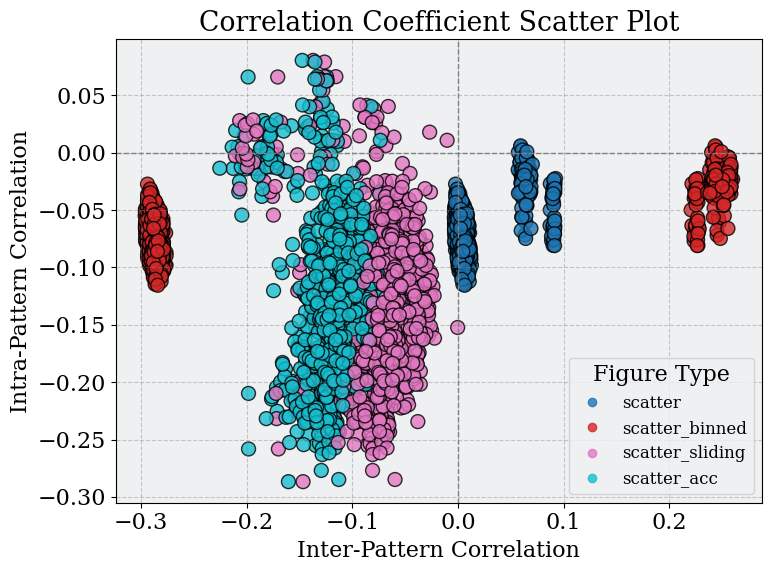

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16


# Read the CSV
df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")

# Drop rows with missing inter or intra values
df_clean = df.dropna(subset=["inter", "intra"])

# Plotting
plt.figure(figsize=(8, 6))
plt.axhline(0, color='gray', linewidth=1.0, linestyle='--')
plt.axvline(0, color='gray', linewidth=1.0, linestyle='--')

scatter = plt.scatter(df_clean["inter"], df_clean["intra"],
                      c=pd.factorize(df_clean["figure"])[0],
                      cmap="tab10", alpha=0.8, edgecolor='black', s=100)

plt.xlabel("Inter-Pattern Correlation")
plt.ylabel("Intra-Pattern Correlation")
plt.title("Correlation Coefficient Scatter Plot")
plt.grid(True, linestyle="--", alpha=0.4)
# plt.xlim(-0.6, 0.6)

# Add legend with figure labels
handles, labels = scatter.legend_elements(prop="colors")
unique_figures = df_clean["figure"].unique()
plt.legend(handles, unique_figures, title="Figure Type", fontsize=12)

plt.tight_layout()
plt.show()

### Boxplot of pearson r under different settings

/tmp/ipykernel_2087039/2843620166.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inter_data = [df[df["distance"] == d][df["figure"] == "scatter_binned"]["corr"] for d in distances]
/tmp/ipykernel_2087039/2843620166.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inter_data = [df[df["distance"] == d][df["figure"] == "scatter_binned"]["corr"] for d in distances]
/tmp/ipykernel_2087039/2843620166.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inter_data = [df[df["distance"] == d][df["figure"] == "scatter_binned"]["corr"] for d in distances]
/tmp/ipykernel_2087039/2843620166.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intra_data = [df[df["distance"] == d][df["figure"] == "scatter_binned"]["corr"] for d in distances]
/tmp/ipykernel_2087039/2843620166.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intra

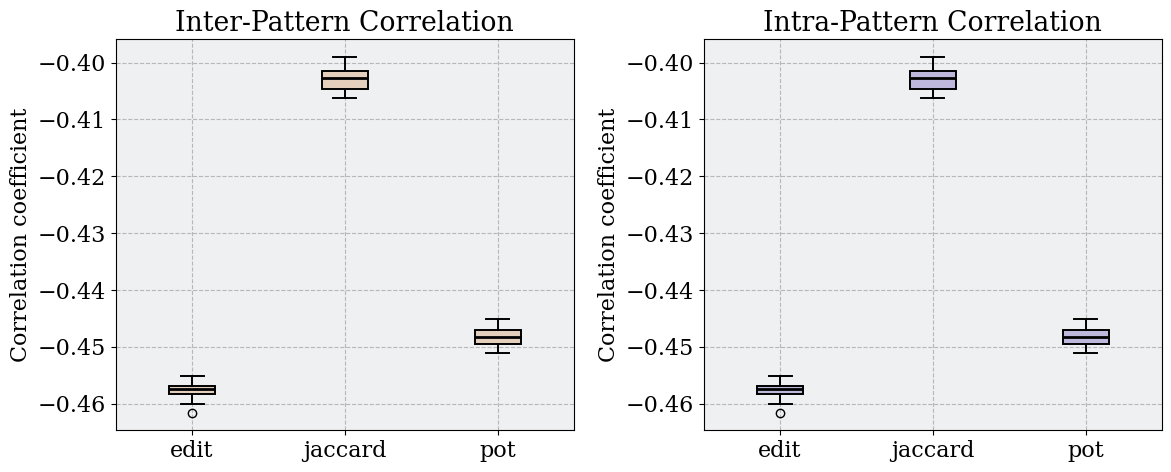

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")
df = df.dropna(subset=["corr"])

distances = sorted(df["distance"].unique())
inter_data = [df[df["distance"] == d][df["figure"] == "scatter_binned"]["corr"] for d in distances]
intra_data = [df[df["distance"] == d][df["figure"] == "scatter_binned"]["corr"] for d in distances]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].boxplot(inter_data, labels=distances, patch_artist=True, boxprops=dict(facecolor=(227/255, 207/255, 187/255), linewidth=1.4), medianprops=dict(color='black', linewidth=3), whiskerprops=dict(linewidth=1.4), capprops=dict(linewidth=1.4))
axes[0].set_title("Inter-Pattern Correlation")
axes[0].set_ylabel("Correlation coefficient")

axes[1].boxplot(intra_data, labels=distances, patch_artist=True, boxprops=dict(facecolor=(190/255, 184/255, 220/255), linewidth=1.4), medianprops=dict(color='black', linewidth=3), whiskerprops=dict(linewidth=1.4), capprops=dict(linewidth=1.4))
axes[1].set_title("Intra-Pattern Correlation")
axes[1].set_ylabel("Correlation coefficient")

plt.tight_layout()
plt.show()


### violin plot of pearson r under different settings

/tmp/ipykernel_3948110/3005753132.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inter_data = [df[df["distance"] == d][df["figure"] == "scatter_acc"]["inter"] for d in distances]
/tmp/ipykernel_3948110/3005753132.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inter_data = [df[df["distance"] == d][df["figure"] == "scatter_acc"]["inter"] for d in distances]
/tmp/ipykernel_3948110/3005753132.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inter_data = [df[df["distance"] == d][df["figure"] == "scatter_acc"]["inter"] for d in distances]
/tmp/ipykernel_3948110/3005753132.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intra_data = [df[df["distance"] == d][df["figure"] == "scatter_acc"]["intra"] for d in distances]
/tmp/ipykernel_3948110/3005753132.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  intra_data = 

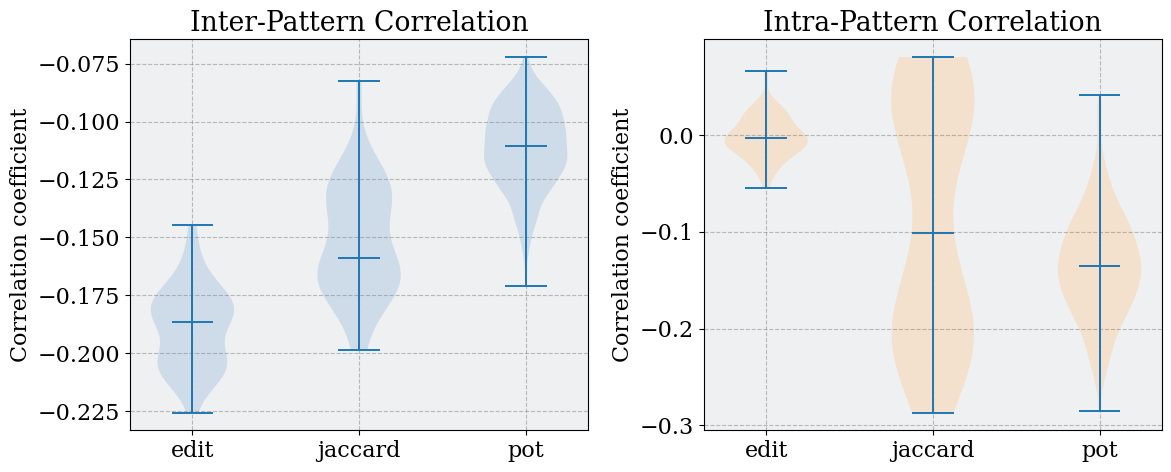

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")
df = df.dropna(subset=["inter", "intra"])

distances = sorted(df["distance"].unique())
inter_data = [df[df["distance"] == d][df["figure"] == "scatter_acc"]["inter"] for d in distances]
intra_data = [df[df["distance"] == d][df["figure"] == "scatter_acc"]["intra"] for d in distances]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# color
axes[0].violinplot(inter_data, showmedians=True, showextrema=True)
axes[0].set_xticks(range(1, len(distances) + 1))
axes[0].set_xticklabels(distances)
axes[0].set_title("Inter-Pattern Correlation")
axes[0].set_ylabel("Correlation coefficient")
for pc in axes[0].collections:
    pc.set_facecolor((130/255, 176/255, 210/255))
    # pc.set_edgecolor('black')
    pc.set_linewidth(1.4)

axes[1].violinplot(intra_data, showmedians=True, showextrema=True)
axes[1].set_xticks(range(1, len(distances) + 1))
axes[1].set_xticklabels(distances)
axes[1].set_title("Intra-Pattern Correlation")
axes[1].set_ylabel("Correlation coefficient")
for pc in axes[1].collections:
    pc.set_facecolor((255/255, 190/255, 122/255))
    # pc.set_edgecolor('black')
    pc.set_linewidth(1.4)

plt.tight_layout()
plt.show()

### Ratio plot of pearson r under different settings

/tmp/ipykernel_3948110/2737371227.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub = df[df["distance"] == d][df["figure"] == "scatter_acc"]
/tmp/ipykernel_3948110/2737371227.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub = df[df["distance"] == d][df["figure"] == "scatter_acc"]
/tmp/ipykernel_3948110/2737371227.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub = df[df["distance"] == d][df["figure"] == "scatter_acc"]


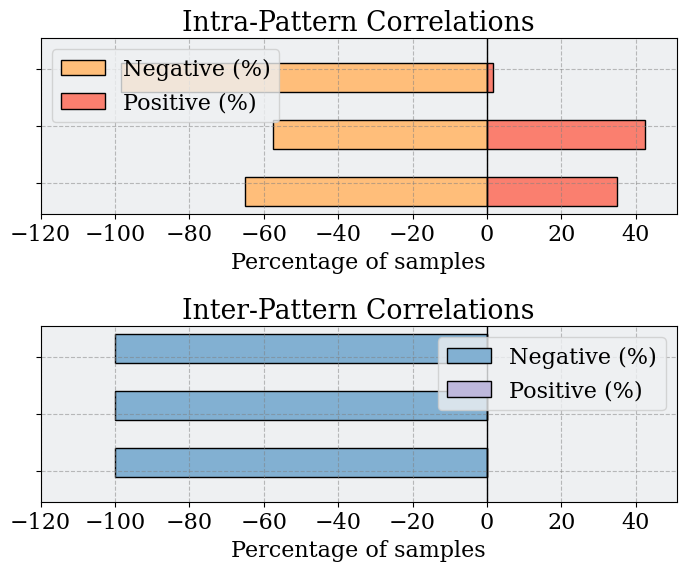

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# ── 0. Matplotlib styling (unchanged) ────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

df = pd.read_csv("/scratch/vjd5zr/project/ReasonEdit/results/figures/correlations_all.csv")
df = df.dropna(subset=["inter", "intra"])

# Compute ratios for each distance
records = []
for d in sorted(df["distance"].unique()):
    sub = df[df["distance"] == d][df["figure"] == "scatter_acc"]
    intra_vals = sub["intra"]
    inter_vals = sub["inter"]
    
    total_intra = len(intra_vals)
    total_inter = len(inter_vals)
    
    intra_neg = (intra_vals < 0).sum() / total_intra * 100
    intra_pos = (intra_vals >= 0).sum() / total_intra * 100
    
    inter_neg = (inter_vals < 0).sum() / total_inter * 100
    inter_pos = (inter_vals >= 0).sum() / total_inter * 100
    
    records.append((d, -intra_neg, intra_pos, -inter_neg, inter_pos))

distances = [r[0] for r in records]
intra_negs = [r[1] for r in records]
intra_poss = [r[2] for r in records]
inter_negs = [r[3] for r in records]
inter_poss = [r[4] for r in records]

y_pos = np.arange(len(distances))

fig, axes = plt.subplots(2, 1, figsize=(7, 6), sharey=True)

# Intra subplot
axes[0].axvline(0, color='black', linewidth=1)
axes[0].barh(y_pos - 0.15, intra_negs, height=0.5, color=(255/255, 190/255, 122/255), edgecolor='black', label="Negative (%)")
axes[0].barh(y_pos - 0.15, intra_poss, height=0.5, color=(250/255, 127/255, 111/255), edgecolor='black', label="Positive (%)")
axes[0].set_title("Intra-Pattern Correlations")
axes[0].set_xlabel("Percentage of samples")
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(distances)
axes[0].set_xlim(min(intra_negs + inter_negs) * 1.2, max(intra_poss + inter_poss) * 1.2)
axes[0].legend()

# Inter subplot
axes[1].axvline(0, color='black', linewidth=1)
axes[1].barh(y_pos + 0.15, inter_negs, height=0.5, color=(130/255, 176/255, 210/255), edgecolor='black', label="Negative (%)")
axes[1].barh(y_pos + 0.15, inter_poss, height=0.5, color=(190/255, 184/255, 220/255), edgecolor='black', label="Positive (%)")
axes[1].set_title("Inter-Pattern Correlations")
axes[1].set_xlabel("Percentage of samples")
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels([])  # shared y-axis on left subplot
axes[1].set_xlim(min(intra_negs + inter_negs) * 1.2, max(intra_poss + inter_poss) * 1.2)
axes[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

### Distribution of Pearson r under different settings (do not separate intra/inter)

Found distances: ['edit', 'jaccard', 'pot']
21388 total rows  |  5347 rows for 'scatter_binned'


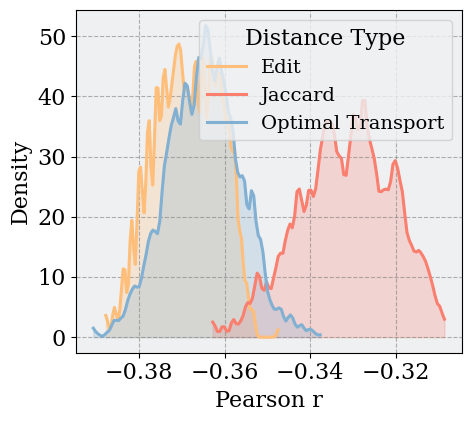

In [1]:
# In[1]  – imports & style
# In[1]  – imports & 样式
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import gaussian_kde   # 用于平滑 KDE

# ── Matplotlib 全局样式 (保持不变) ──────────────────────────────────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 16

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

# In[2]  – load & prep the data
csv_path = "/scratch/vjd5zr/project/ReasonEdit/results/figures/origin/correlations_all.csv"
df = pd.read_csv(csv_path).dropna(subset=["corr"])

target_fig   = "scatter_binned"   # choose one of: scatter, scatter_binned, …
bins         = 25                 # histogram resolution
distances    = sorted(df["distance"].unique())
distances_name = ['Edit', "Jaccard", r"Optimal Transport"]

print("Found distances:", distances)
print(f"{len(df)} total rows  |  {len(df[df['figure'] == target_fig])} rows for '{target_fig}'")

# In[3] – smoothed-hist (FD bins + Gaussian filter)
from scipy.ndimage import gaussian_filter1d

plt.figure(figsize=(5, 4.5))

for idx, dist in enumerate(distances):
    vals = df[(df["figure"] == target_fig) & (df["distance"] == dist)]["corr"].dropna()
    if len(vals) < 2:               # 样本太少就跳过
        continue

    # ① Freedman–Diaconis 规则确定 bin 宽
    q25, q75 = np.percentile(vals, [25, 75])
    iqr      = q75 - q25
    bin_w    = 2 * iqr / (len(vals) ** (1/3))   # FD 公式
    bins     = max(int(np.ceil((vals.max() - vals.min()) / bin_w)), 100)

    counts, edges = np.histogram(vals, bins=bins, density=True)
    centers       = 0.5 * (edges[:-1] + edges[1:])

    # ② 轻度高斯平滑（sigma 可调，1≈轻/ 2≈中）
    smooth = gaussian_filter1d(counts, sigma=1.0)

    color = palette[idx % len(palette)]
    plt.plot(centers, smooth,  linewidth=2.2, color=color, label=f"{distances_name[idx]}")
    plt.fill_between(centers, smooth, 0, alpha=0.25, color=color)

plt.xlabel("Pearson r")
plt.ylabel("Density")
# plt.title(f"Smoothed empirical density of '{target_fig}' correlations")
plt.legend(title="Distance Type", loc="upper right", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



In [ ]:
import os 
import sys

sys.path.append(os.path.abspath("../../.."))  # 确保能 import 到你的 helpers

[✓] saved → /sfs/weka/scratch/vjd5zr/project/ReasonEdit/results/figures/level_1/motivations.pdf
exists: True


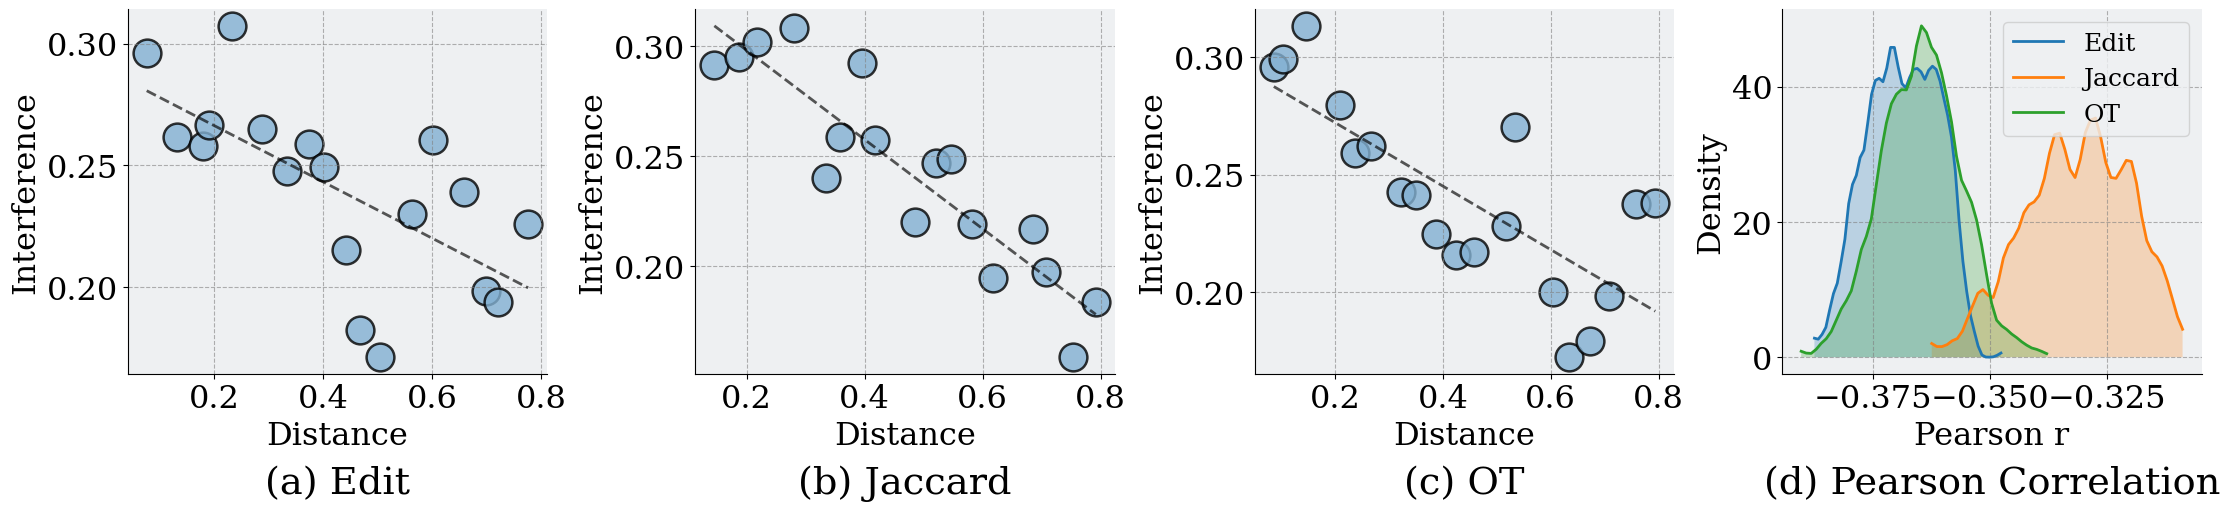

In [6]:
# %% 一行四图：三张combined(seed合并) + 一张全局密度（全部写在一起，无内部import）

from pathlib import Path
from typing import List, Tuple, Optional
import uuid, shutil
import os
import sys

sys.path.append(os.path.abspath("../../.."))  # 确保能 import 到你的 helpers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.linalg import block_diag
from scipy.stats import linregress
from scipy.ndimage import gaussian_filter1d

# ─────────── 全局样式（与你的脚本一致） ───────────
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
rcParams["font.size"] = 23

PALETTE = [
    (255/255, 190/255, 122/255),  # peach (intra)
    (250/255, 127/255, 111/255),  # salmon (unused)
    (130/255, 176/255, 210/255),  # sky‑blue (inter)
    (142/255, 207/255, 201/255),  # teal    (unused)
]

BLUE = (76/255, 114/255, 176/255)

# ─────────── 基础工具（与原脚本保持一致语义） ───────────
def lr_slug(lr: float | str) -> str:
    return str(lr).replace(".", "p").replace("-", "m")

def resolve_tag(tag: Optional[str], resume: Optional[str], origin_tag: str) -> Optional[str]:
    if tag:
        return tag
    if resume:
        return Path(resume).stem
    return origin_tag if origin_tag else None

def load_distance(distance: str, seed: int, TAG: Optional[str]) -> pd.DataFrame:
    # 忠于你第一段脚本的路径：results/output/distance/<distance>/<TAG>/seed{seed}.csv
    f = (Path(f"../../../results/output/distance/level_1/{distance}/{TAG}/seed{seed}.csv")
         if TAG else Path(f"results/output/distance/level_1/{distance}/seed{seed}.csv"))
    distance_df = pd.read_csv(f, index_col=0)
    # if distance type is "edit", distance value is doubled (because of bidirectional paths)
    if distance == "edit":
        distance_df = distance_df / 2
    return distance_df

def load_delta(lr: float, TAG: Optional[str]) -> pd.DataFrame:
    s = lr_slug(lr)
    # 忠于你第一段脚本的路径：results/output/perlogic/<lr_slug>/<TAG>/delta.csv
    f = (Path(f"../../../results/output/perlogic/level_1/{s}/{TAG}/delta.csv")
         if TAG else Path(f"results/output/perlogic/level_1/{s}/delta.csv"))
    return pd.read_csv(f, index_col=0)

def load_acc_counts(lr: float, TAG: Optional[str]) -> Tuple[pd.DataFrame, pd.DataFrame]:
    s = lr_slug(lr)
    root = (Path(f"../../../results/output/perlogic/level_1/{s}/{TAG}")
            if TAG else Path(f"results/output/perlogic/{s}"))
    return (pd.read_csv(root / "n_total.csv", index_col=0),
            pd.read_csv(root / "delta_count.csv", index_col=0))

def block_diag_df(mats: List[pd.DataFrame]) -> pd.DataFrame:
    if len(mats) == 1:
        return mats[0]
    big = block_diag(*[m.values for m in mats])
    names = []
    for k, m in enumerate(mats):
        names.extend([f"{idx}_r{k}" for idx in m.index])
    return pd.DataFrame(big, index=names, columns=names)

# ─────────── 与原版一致的辅助：风格、回归线、相关系数 ───────────
def _style_axes_inline(ax, xlab: str, ylab: str):
    ax.set_xlabel(xlab); ax.set_ylabel(ylab)
    ax.set_facecolor("#EEF0F2")
    ax.grid(True, linestyle="--", color="gray", alpha=0.6)
    for side in ("top", "right"):
        ax.spines[side].set_visible(False)

def _add_corr_line_inline(ax, x: np.ndarray, y: np.ndarray):
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() > 1:
        x_, y_ = x[m], y[m]
        if x_.std() > 0 and y_.std() > 0:
            slope, intercept, *_ = linregress(x_, y_)
            xs = np.linspace(np.nanmin(x_), np.nanmax(x_), 120)
            ax.plot(xs, slope * xs + intercept,
                    linestyle="--", linewidth=2, color="black", alpha=0.65)

def _corr_inline(x: np.ndarray, y: np.ndarray) -> float:
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 2: 
        return float("nan")
    x, y = x[m], y[m]
    if x.std() == 0 or y.std() == 0:
        return float("nan")
    return float(np.corrcoef(x, y)[0, 1])

# ─────────── 三个“combined”版本（画到传入 ax；逻辑忠于原实现） ───────────
def plot_basic_scatter_combined(
    dist_cat: pd.DataFrame,
    delta_cat: pd.DataFrame,
    ax,
    xlab: str = "Distance",
    ylab: str = "Interference",
) -> float:
    # 与原版一致：过滤 (x != 0) & (y >= 0.1)
    x_all = dist_cat.values.flatten()
    y_all = delta_cat.values.flatten()
    mask = (x_all != 0) & (y_all >= 0.1)

    ax.scatter(x_all[mask], y_all[mask], s=400, marker="o", facecolor=PALETTE[2],
               edgecolor="black", linewidth=1.8, alpha=.8)
    _add_corr_line_inline(ax, x_all[mask], y_all[mask])
    _style_axes_inline(ax, xlab, ylab)
    return _corr_inline(x_all[mask], y_all[mask])

def plot_sliding_scatter_combined(
    dist_cat: pd.DataFrame,
    delta_cat: pd.DataFrame,
    ax,
    win: float = .10,
    step: float = .10,
    xlab: str = "Distance",
    ylab: str = "Interference",
) -> float:
    # 与原版一致：窗口/步长是“绝对值”，不是比例
    x_all = dist_cat.values.flatten()
    y_all = delta_cat.values.flatten()
    valid = (x_all != 0) & (y_all >= 0.1)
    xv, yv = x_all[valid], y_all[valid]
    if len(xv) == 0:
        _style_axes_inline(ax, xlab, ylab)
        return float("nan")

    xs, ys = [], []
    lo, hi = xv.min(), xv.max()
    for left in np.arange(lo, hi - win + 1e-9, step):
        sel = (xv >= left) & (xv < left + win)
        if sel.any():
            xs.append(xv[sel].mean())
            ys.append(yv[sel].mean())
    xs, ys = np.asarray(xs), np.asarray(ys)
    mask = xs <= 0.8
    xs, ys = xs[mask], ys[mask]

    ax.scatter(xs, ys, s=400, marker="o", facecolor=PALETTE[2],
               edgecolor="black", linewidth=1.8, alpha=.8)
    _add_corr_line_inline(ax, xs, ys)
    _style_axes_inline(ax, xlab, ylab)
    return _corr_inline(xs, ys)

def plot_accuracy_scatter_combined(
    dist_cat: pd.DataFrame,
    n_total_cat: pd.DataFrame,
    delta_count_cat: pd.DataFrame,
    ax,
    win: float = .10,
    step: float = .10,
    xlab: str = "Distance",
) -> float:
    """
    忠于原版 plot_accuracy_scatter：
    - 展开 mx(=dist)、a_all(acc=delta_count/n_total)、t_all(total)
    - 在 x 上做绝对宽度滑窗；窗口内 y 为 (acc * total)/total 的加权平均
    """
    mx = dist_cat.values.flatten()
    m_tot = n_total_cat.values.flatten()
    m_cor = delta_count_cat.values.flatten()

    with np.errstate(invalid="ignore", divide="ignore"):
        acc_all = np.where(m_tot == 0, np.nan, m_cor / m_tot)

    mask = np.isfinite(mx) & np.isfinite(acc_all)
    if mask.sum() == 0:
        _style_axes_inline(ax, xlab, "Accuracy")
        return float("nan")

    x_all = mx[mask]
    a_all = acc_all[mask]
    t_all = m_tot[mask]

    xs, ys = [], []
    lo, hi = np.nanmin(x_all), np.nanmax(x_all)
    for left in np.arange(lo, hi - win + 1e-9, step):
        sel = (x_all >= left) & (x_all < left + win)
        if sel.any():
            acc = np.nansum(a_all[sel] * t_all[sel]) / np.nansum(t_all[sel])
            xs.append(np.nanmean(x_all[sel]))
            ys.append(acc)
    xs, ys = np.asarray(xs), np.asarray(ys)

    ax.scatter(xs, ys, s=400, marker="o", facecolor=PALETTE[2],
               edgecolor="black", linewidth=1.8, alpha=.8)
    _add_corr_line_inline(ax, xs, ys)
    _style_axes_inline(ax, xlab, "Accuracy")
    return _corr_inline(xs, ys)

# ─────────── 组装 combined 矩阵（block-diag 合并多个 seeds） ───────────
def build_combined(distance: str, seeds: List[int], lr: float, TAG: Optional[str]):
    grp = [(s, lr) for s in seeds]
    dist_cat  = block_diag_df([load_distance(distance, s, TAG) for s, _ in grp])
    delta_cat = block_diag_df([load_delta(lr, TAG) for _, lr in grp])
    tots, cors = [], []
    for _, lr in grp:
        tot, cor = load_acc_counts(lr, TAG)
        tots.append(tot); cors.append(cor)
    n_total_cat     = block_diag_df(tots).round().astype(int)
    delta_count_cat = block_diag_df(cors).round().astype(int)
    return dist_cat, delta_cat, n_total_cat, delta_count_cat

# ─────────── 全局密度（与之前一致） ───────────
def plot_global_density(ax, csv_path: Path, target_fig="scatter_binned"):
    df = pd.read_csv(csv_path).dropna(subset=["corr"])
    df = df[df["figure"] == target_fig]
    distances = sorted(df["distance"].unique())
    distances_name = ['Edit', 'Jaccard', r'OT']

    for idx, dist in enumerate(distances):
        vals = df[df["distance"] == dist]["corr"].dropna()
        if len(vals) < 2:
            continue
        q25, q75 = np.percentile(vals, [25, 75])
        iqr = q75 - q25
        bin_w = 2 * iqr / (len(vals) ** (1/3))
        bin_w = bin_w if bin_w > 0 else 1e-6
        bins = max(int(np.ceil((vals.max() - vals.min()) / bin_w)), 50)
        counts, edges = np.histogram(vals, bins=bins, density=True)
        centers = 0.5 * (edges[:-1] + edges[1:])
        smooth = gaussian_filter1d(counts, sigma=1.0)

        ax.plot(centers, smooth, linewidth=2, label=(distances_name[idx] if idx < len(distances_name) else str(dist)))
        ax.fill_between(centers, smooth, 0, alpha=0.25)

    _style_axes_inline(ax, "Pearson r", "Density")
    ax.set_title("(d) Pearson Correlation", y=-0.35)
    ax.set_xlabel("Pearson r"); ax.set_ylabel("Density")
    ax.legend(fontsize=18)

# ======================== 参数区（按需修改） ========================
TAG        = resolve_tag(tag="origin", resume=None, origin_tag="origin")
SEEDS      = [[1, 2, 3, 4, 5, 7, 8, 9], [1, 2, 3], [1, 2, 3,4,5,6,7,10]]
LR         = 5e-5            # 前三张统一使用的 lr
DISTANCES  = ["edit", "jaccard", "pot"]   # 三个面板对应的距离
DISTANCES_NAME = ['(a) Edit', '(b) Jaccard', r'(c) OT']
MODES      = ["sliding", "sliding", "sliding"]# 三个面板对应的画法
WIN, STEP  = 0.09, 0.04      # 与原实现一致：绝对宽度窗口/步长
CORR_CSV   = Path(f"../../../results/figures/level_1/{TAG}/correlations_all.csv")  # 第四张密度图数据

# ======================== 绘图：一行四图 ============================
# ─────────── 修复版保存逻辑（更健壮） ───────────
# 1) 统一字体拼写（非必须，但建议）
# plt.rcParams["font.family"] = "DejaVu Serif"

# 2) 画图
fig, axes = plt.subplots(1, 4, figsize=(22, 5), constrained_layout=True)

for idx, (distance, mode) in enumerate(zip(DISTANCES, MODES)):
    dist_cat, delta_cat, n_total_cat, delta_count_cat = build_combined(distance, SEEDS[idx], LR, TAG)
    if mode == "scatter":
        plot_basic_scatter_combined(dist_cat, delta_cat, axes[idx], xlab="Distance", ylab="Interference")
    elif mode == "sliding":
        plot_sliding_scatter_combined(dist_cat, delta_cat, axes[idx], win=WIN, step=STEP, xlab="Distance", ylab="Interference")
    elif mode == "acc":
        plot_accuracy_scatter_combined(dist_cat, n_total_cat, delta_count_cat, axes[idx], win=WIN, step=STEP, xlab="Distance")
    else:
        raise ValueError(f"Unknown mode: {mode}")
    axes[idx].set_title(f"{DISTANCES_NAME[idx]}", y=-0.35)

plot_global_density(axes[3], CORR_CSV, target_fig="scatter_binned")

# 3) 路径用“绝对路径”且确保目录存在
#    如果你确实要以 repo 根为基准，可以用环境变量或自定义 ROOT；这里用 CWD 更直观
OUT_DIR = Path("../../../results/figures/level_1")
OUT_DIR.mkdir(parents=True, exist_ok=True)
out_all = OUT_DIR / "motivations.pdf"

# 4) 用 fig.savefig（更稳），并加紧边距 / 背景色
fig.savefig(out_all, dpi=600, bbox_inches="tight", facecolor="white")

# 5) 明确告知保存位置并校验
print(f"[✓] saved → {out_all.resolve()}")
print("exists:", out_all.exists())

# （可选）如在循环里频繁作图，建议关闭以节省内存
# plt.close(fig)

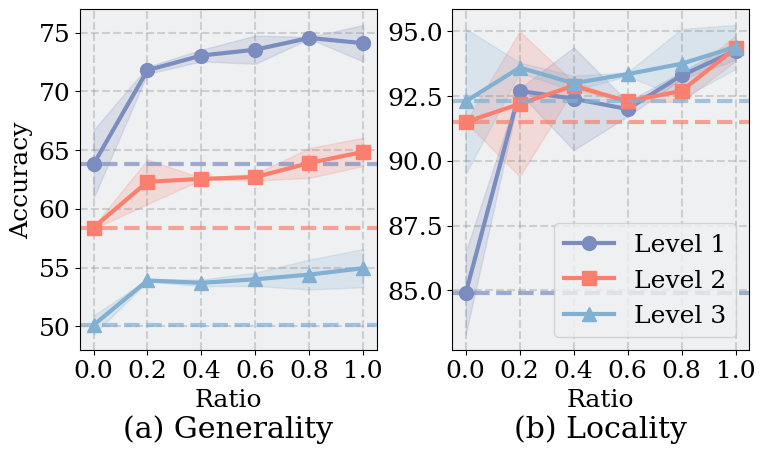

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ──────────────────── GLOBAL STYLE ────────────────────
plt.rcParams.update({
    "font.family": "DejaVu Serif",     # 修正拼写
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.linewidth": 1.5,
    "grid.alpha": 0.5,
})
plt.rcParams["font.size"] = 18

# 调色板
PALETTE = [
    (123/255.0, 141/255.0, 191/255.0),  # soft blue-gray
    (250/255.0, 127/255.0, 111/255.0),  # coral red
    (130/255.0, 176/255.0, 210/255.0),  # light blue
]

# ─── 左边：按给定数据（Level1/2/3） ───
x_left = ["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"]

y1_left = np.array([63.8, 71.8, 73.05, 73.55, 74.55, 74.1])
std1_left = np.array([2.9, 0.3, 0.4949747468, 1.202081528, 0.07071067812, 1.555634919])

y2_left = np.array([58.4, 62.3, 62.55, 62.7, 63.9, 64.85])
std2_left = np.array([0.1, 1.9, 0.07071067812, 0.2828427125, 1.272792206, 1.202081528])

y3_left = np.array([50.1, 53.9, 53.7, 54.0, 54.4, 54.95])
std3_left = np.array([0.8, 0.1, 0.2828427125, 0.5656854249, 1.272792206, 1.626345597])

# ─── 右边：按给定数据（含 0.0 基线） ───
x_right = ["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"]

y1_right = np.array([84.9, 92.7, 92.4, 92.0, 93.3, 94.25])
std1_right = np.array([1.6, 0.1, 1.979898987, 0.2828427125, 0.1414213562, 0.3535533906])

y2_right = np.array([91.5, 92.2, 92.9, 92.3, 92.7, 94.35])
std2_right = np.array([0.0, 2.8, 0.1414213562, 0.0, 0.4242640687, 0.4949747468])

y3_right = np.array([92.3, 93.6, 93.0, 93.35, 93.75, 94.4])
std3_right = np.array([2.8, 0.2, 0.2828427125, 0.07071067812, 1.343502884, 0.8485281374])

# ─── 绘制子图 ───
fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=False)

# 左图（Generality）
axes[0].plot(x_left, y1_left, label="Level 1", color=PALETTE[0], marker="o", linewidth=3, markersize=10)
axes[0].fill_between(x_left, y1_left-std1_left, y1_left+std1_left, color=PALETTE[0], alpha=0.2)
axes[0].axhline(y=y1_left[0], xmin=0, xmax=1, color=PALETTE[0], linestyle="--", alpha=0.7, linewidth=3)

axes[0].plot(x_left, y2_left, label="Level 2", color=PALETTE[1], marker="s", linewidth=3, markersize=10)
axes[0].fill_between(x_left, y2_left-std2_left, y2_left+std2_left, color=PALETTE[1], alpha=0.2)
axes[0].axhline(y=y2_left[0], xmin=0, xmax=1, color=PALETTE[1], linestyle="--", alpha=0.7, linewidth=3)

axes[0].plot(x_left, y3_left, label="Level 3", color=PALETTE[2], marker="^", linewidth=3, markersize=10)
axes[0].fill_between(x_left, y3_left-std3_left, y3_left+std3_left, color=PALETTE[2], alpha=0.2)
axes[0].axhline(y=y3_left[0], xmin=0, xmax=1, color=PALETTE[2], linestyle="--", alpha=0.7, linewidth=3)

axes[0].set_title("(a) Generality", loc="center", y=-0.28)
axes[0].set_xlabel("Ratio")
axes[0].set_ylabel("Accuracy")
axes[0].set_xticks(x_left)
axes[0].grid(True, linestyle="--", alpha=0.3)

# 右图（Locality）
axes[1].plot(x_right, y1_right, label="Level 1", color=PALETTE[0], marker="o", linewidth=3, markersize=10)
axes[1].fill_between(x_right, y1_right-std1_right, y1_right+std1_right, color=PALETTE[0], alpha=0.2)
axes[1].axhline(y=y1_right[0], xmin=0, xmax=1, color=PALETTE[0], linestyle="--", alpha=0.7, linewidth=3)

axes[1].plot(x_right, y2_right, label="Level 2", color=PALETTE[1], marker="s", linewidth=3, markersize=10)
axes[1].fill_between(x_right, y2_right-std2_right, y2_right+std2_right, color=PALETTE[1], alpha=0.2)
axes[1].axhline(y=y2_right[0], xmin=0, xmax=1, color=PALETTE[1], linestyle="--", alpha=0.7, linewidth=3)

axes[1].plot(x_right, y3_right, label="Level 3", color=PALETTE[2], marker="^", linewidth=3, markersize=10)
axes[1].fill_between(x_right, y3_right-std3_right, y3_right+std3_right, color=PALETTE[2], alpha=0.2)
axes[1].axhline(y=y3_right[0], xmin=0, xmax=1, color=PALETTE[2], linestyle="--", alpha=0.7, linewidth=3)

axes[1].set_title("(b) Locality", loc="center", y=-0.28)
axes[1].set_xlabel("Ratio")
axes[1].set_xticks(x_right)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.savefig("tmp.pdf", format="pdf", dpi=600, bbox_inches="tight")
plt.show()

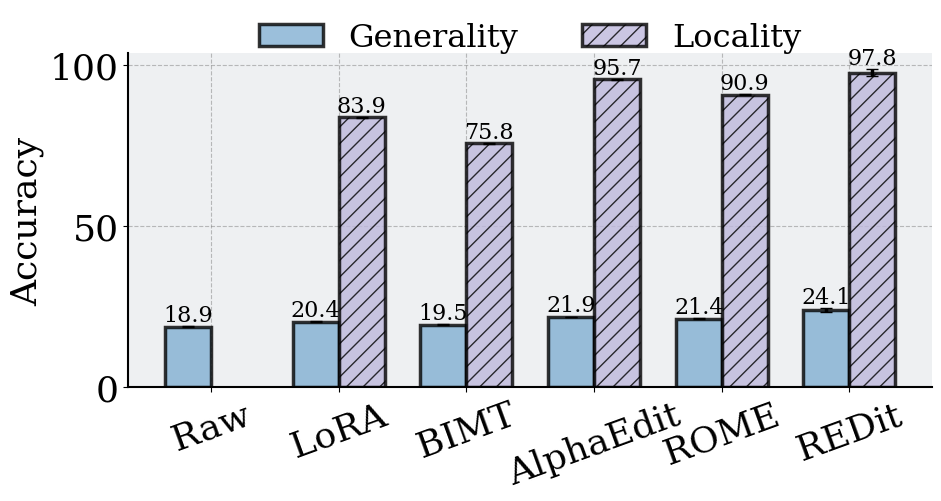

In [57]:
# Grouped bar chart with 2 bars per group (5 groups), with mean ± std error bars.
# Uses your specified Matplotlib rcParams and custom palette.

import numpy as np
import matplotlib.pyplot as plt

# =====================
# 1) Style & palette
# =====================
plt.rcParams.update({
    "font.family": "DeJavu Serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "mathtext.default": "regular",
    "axes.facecolor": "#EEF0F2",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "grid.alpha": 0.5,
})
plt.rcParams["font.size"] = 26

palette = [
    (255/255, 190/255, 122/255),  # peach
    (250/255, 127/255, 111/255),  # salmon
    (130/255, 176/255, 210/255),  # sky-blue
    (142/255, 207/255, 201/255),  # teal
    (190/255, 184/255, 220/255),  # lavender
    (227/255, 207/255, 187/255),  # beige
]

# =====================
# 2) Example data
#    Replace these with your actual 2×5 means & stds
# =====================
# Means for condition A and B across 5 groups
means_A = np.array([18.9, 20.4, 19.5, 21.9, 21.4, 24.05])
stds_A  = np.array([0.1, 0.1, 0.1, 0.1, 0.2, 0.5])

means_B = np.array([0, 83.9, 75.8, 95.7, 90.9, 97.75])
stds_B  = np.array([0, 0.1, 0.1, 0.1, 0.2, 1.06])

groups = ["Raw", "LoRA", "BIMT", "AlphaEdit", "ROME", "REDit"]

# =====================
# 3) Plot
# =====================
x = np.arange(len(groups))
width = 0.36

fig, ax = plt.subplots(figsize=(10, 10 * 0.58))

bars_A = ax.bar(
    x - width/2, means_A, width,
    yerr=stds_A, capsize=4, label="Generality",
    edgecolor="black", linewidth=2.5, color=palette[2], ecolor="black",error_kw=dict(linewidth=2.5),
    alpha=0.8
)
bars_B = ax.bar(
    (x + width/2)[1:], means_B[1:], width,
    yerr=stds_B[1:], capsize=4, label="Locality",
    edgecolor="black", linewidth=2.5, color=palette[4], ecolor="black",error_kw=dict(linewidth=2.5),
    hatch='//', 
    alpha=0.8
)

ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=20)
ax.set_ylabel("Accuracy", fontsize=26)
ax.legend(frameon=False, fontsize=23, ncol=2, loc="upper center", bbox_to_anchor=(0.5, 1.18))

for spine in ax.spines.values():
        spine.set_linewidth(1.5)   # thickness
        spine.set_edgecolor("black")  # color
        # remove top and right spines
        if spine.spine_type in ['top', 'right']:
            spine.set_visible(False)

ax.bar_label(bars_A, fmt="%.1f", padding=0, fontsize=16, rotation=0)
ax.bar_label(bars_B, fmt="%.1f", padding=0, fontsize=16, rotation=0)


ax.set_axisbelow(True)  # grid below bars
fig.tight_layout()

# Save outputs
# png_path = "/mnt/data/grouped_bars.png"
pdf_path = "tmp.pdf"
# plt.savefig(png_path, dpi=300, bbox_inches="tight")
plt.savefig(pdf_path, format="pdf", dpi=600, bbox_inches="tight")

plt.show()
